In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

“I confirm that this is my own work, except where clearly indicated.”

In [2]:
data_set = pd.read_csv("train.csv")

In [3]:
data_set.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
submission_set = pd.read_csv("test.csv")

In [5]:
submission_set.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb4c438>]],
      dtype=object)

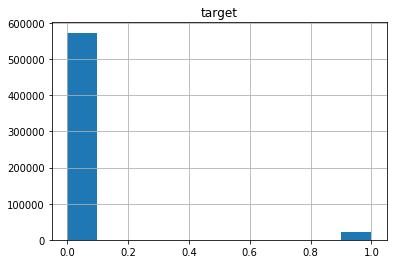

In [7]:
data_set.hist(column='target')

Majority of cases do NOT file a claim. This gives us quite an imbalanced data set to start off with. Let's keeep this in mind as we analyse further.

In [8]:
data_set.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
target_count = data_set.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 573518
Class 1: 21694
Proportion: 26.44 : 1


In [10]:
sample_sub = pd.read_csv("sample_submission.csv")

In [11]:
sample_sub.head()

,id,target
0,0,0.0364
1,1,0.0364
2,2,0.0364
3,3,0.0364
4,4,0.0364


In [12]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      892816 non-null  int64  
 1   target  892816 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 13.6 MB


In [13]:
sample_sub.describe()

,id,target
count,8.928160e+05,8.928160e+05
mean,7.441535e+05,3.640000e-02
std,4.296830e+05,6.938898e-18
min,0.000000e+00,3.640000e-02
25%,3.720218e+05,3.640000e-02
50%,7.443070e+05,3.640000e-02
75%,1.116308e+06,3.640000e-02
max,1.488026e+06,3.640000e-02


There seems to be three different data types in the given features: Binary, Categorical, and Floats. Perhaps it is a good idea to group the data by their type and start to analyse from there.

First I will have to split the data into training, and test sets. Before I do this I need to do some "housekeeping" and deal with any NA or empty data points.

In [14]:
data_set_copy = data_set.copy()

In [15]:
data_set_copy = data_set_copy.dropna()
data_set_copy.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dropna() did not seem to get rid of any rows. This is good- meaning the original data set did not have any NA points.

Now we can split the data into training and test sets. I am also considering making a validation set however I do not believe we will use any sort of neural network to create a model in this problem.

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(data_set, data_set["target"]):
    strat_train_set = data_set.loc[train_index]
    strat_test_set = data_set.loc[test_index]

X_train = strat_train_set.copy()
y_train = strat_train_set["target"].copy()
X_train.drop("target", axis=1, inplace=True)

X_test = strat_test_set.copy()
y_test = strat_test_set["target"].copy()
X_test.drop("target", axis=1, inplace=True)

X_train.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,4.761690e+05,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,...,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000
mean,7.439851e+05,1.900061,1.358866,4.422892,0.416791,0.405157,0.393047,0.257079,0.163996,0.185877,...,5.440163,1.440909,2.872308,7.537544,0.122186,0.628134,0.554215,0.287219,0.349099,0.153097
std,4.293658e+05,1.983412,0.664223,2.699456,0.493292,1.350204,0.488428,0.437024,0.370273,0.389008,...,2.332892,1.202201,1.694021,2.746474,0.327500,0.483303,0.497053,0.452465,0.476686,0.360081
min,7.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.721420e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.439810e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115616e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_test.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,1.190430e+05,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,...,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000
mean,7.430773e+05,1.901649,1.359248,4.425023,0.416807,0.405316,0.396521,0.256848,0.163622,0.183010,...,5.446259,1.445957,2.872206,7.544954,0.123392,0.626664,0.554052,0.287031,0.348723,0.154205
std,4.293770e+05,1.985305,0.666079,2.701697,0.493390,1.352398,0.489177,0.436897,0.369933,0.386676,...,2.332792,1.206000,1.698352,2.747364,0.328888,0.483692,0.497072,0.452378,0.476568,0.361146
min,1.600000e+01,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.713720e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.420430e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115297e+06,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488013e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,18.000000,9.000000,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


No conspicuous differences between any of the std dev or mean values.

Now the only way to indicate different types of columns is the suffix of the column names. Binary columns end in "_bin_", category columns end in "_cat_" and all other columns can be assumed to be floats or ints. The column names also indicate some meaning to those columns that we can use to group them. These are shown as _ind, reg, car,_ and _calc._ We can also explore data by these categories.

In [18]:
ind_cols = [col for col in X_train.columns if 'ind' in col]
print(list(X_train.columns))
print(ind_cols)

['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bi

In [29]:
reg_cols = [col for col in X_train.columns if 'reg' in col]
car_cols = [col for col in X_train.columns if 'car' in col]
calc_cols = [col for col in X_train.columns if 'calc' in col]

In [53]:
data_set['ps_ind_17_bin'].describe()

count    595212.000000
mean          0.121081
std           0.326222
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ps_ind_17_bin, dtype: float64

In [26]:
print(len(ind_cols))

18


In [61]:
data_set['ps_reg_01'].describe()

count    595212.000000
mean          0.610991
std           0.287643
min           0.000000
25%           0.400000
50%           0.700000
75%           0.900000
max           0.900000
Name: ps_reg_01, dtype: float64

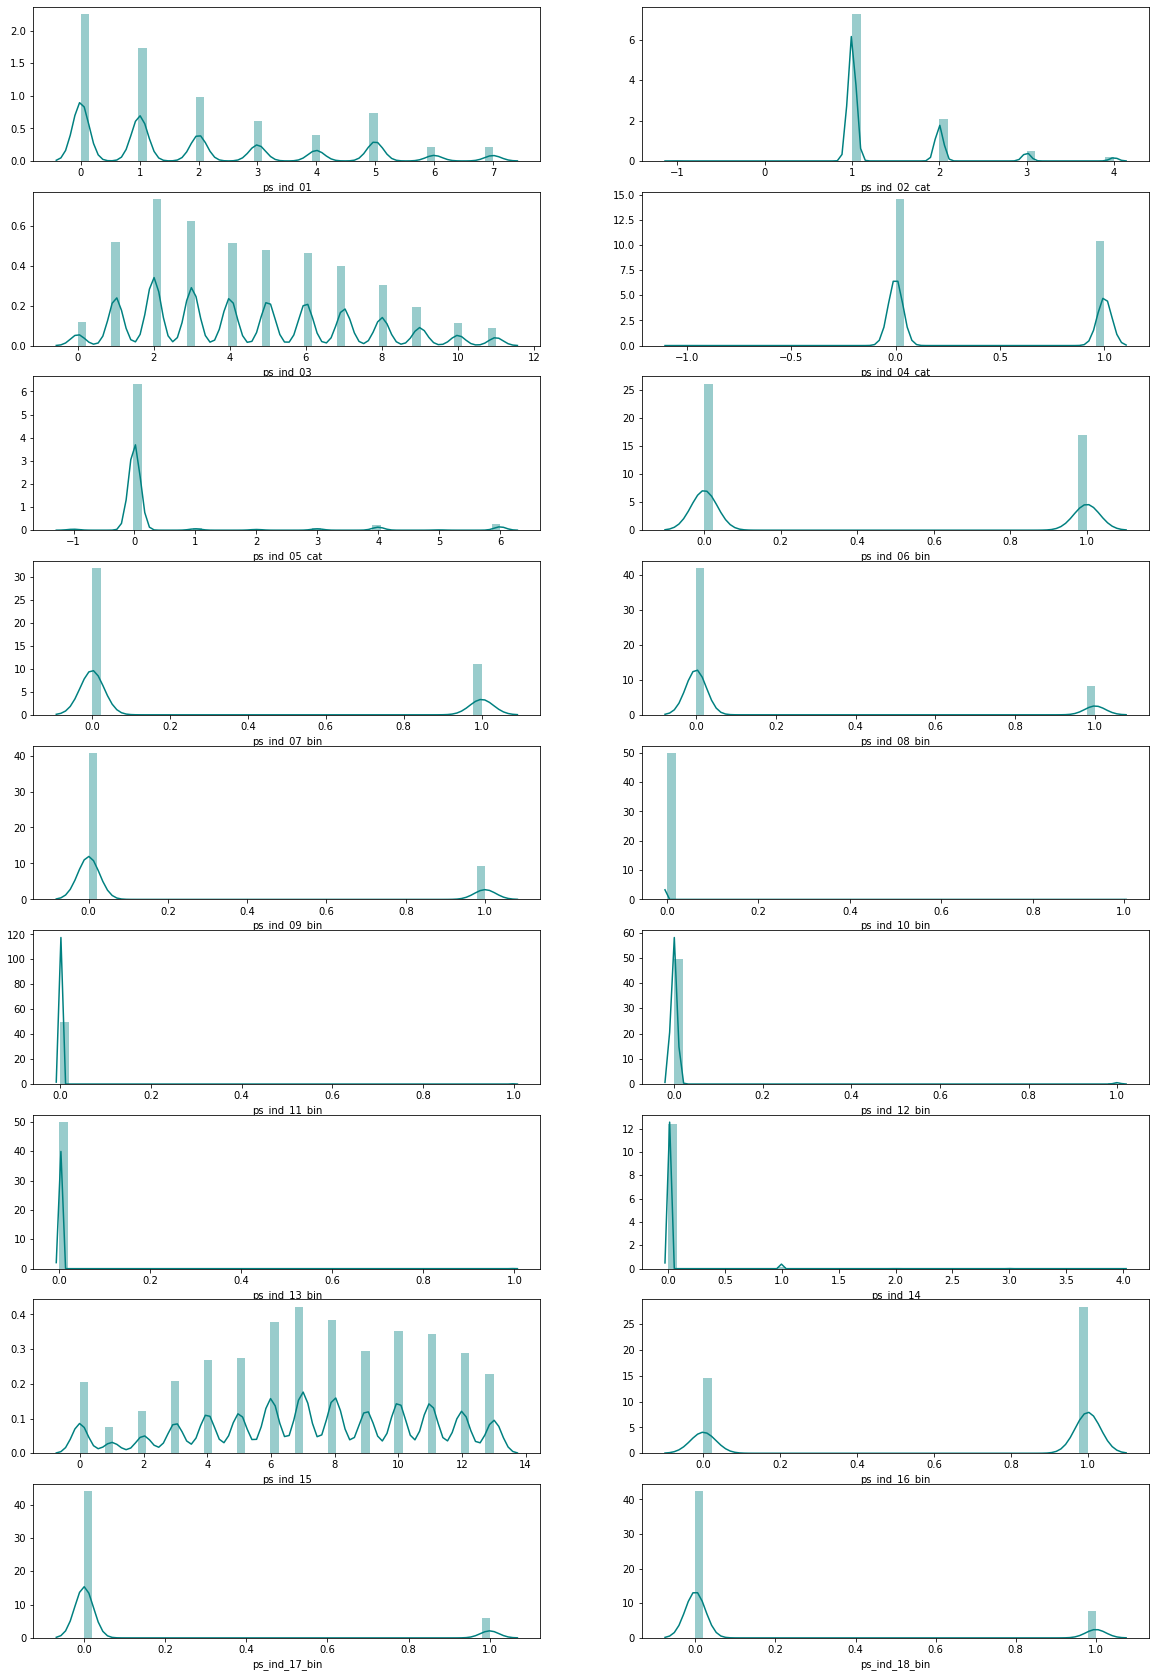

In [69]:
import seaborn as sns
f, axes = plt.subplots(9, 2, figsize=(20, 30), sharex=False)
idx=0
idy=0
for col in ind_cols:
    sns.distplot(data_set[col], color="teal", ax=axes[idx, idy])
    if(idy==0):
        idy += 1
    elif(idy==1):
        idx += 1
        idy = 0

Let's analyze! ps_ind_01, 03, and 15 have fairly equal distributions among their possible values with 01 and 03 being slightly left-skewed- meaning there is a more significant clustering among smaller values for those features. Almost all points in 14 have a value of 0.

As for the categorical ind features represented by 02, 04, and 05 one can see frequency decreases as the category increments in 02 with the majority around category 1. 04 has data between 0 and 1 (like a binary feature) pretty evenly distributed. 05 has the vast majority of values equal to 0 but pretty even distribution across the rest of the possible values, hence it has a high mean compared to its mode.

The rest of the ind features are binary. 06 and 16 are more evenly distributed than the others. All of the other binary features have a large clustering around 0.

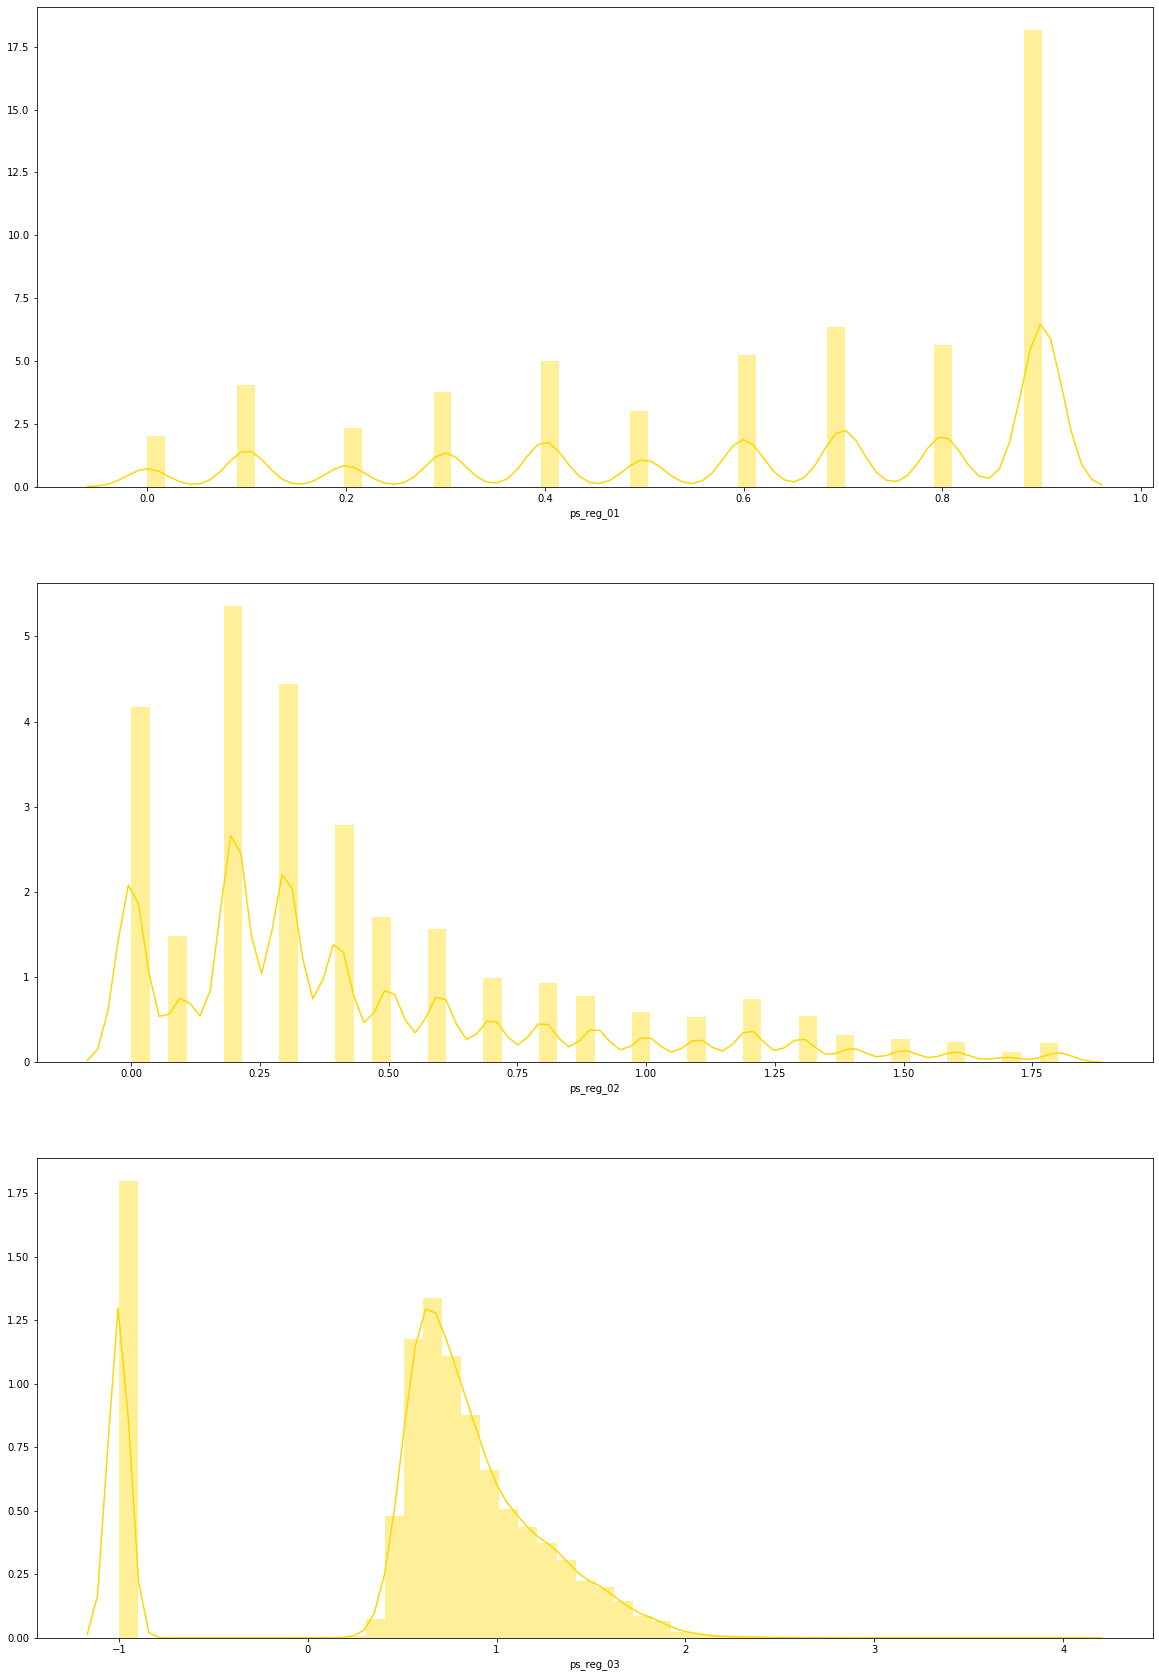

In [68]:
f, axes = plt.subplots(3, 1, figsize=(20, 30), sharex=False)
idx=0
idy=1
for col in reg_cols:
    sns.distplot(data_set[col], color="gold", ax=axes[idx])
    if(idy==0):
        idy += 1
    elif(idy==1):
        idx += 1
        #idy = 0

According to the problem specifications on Kaggle "Values of -1 indicate that the feature was missing from the observation." Therefore all values of -1 are actually NA values for the data. We will leave it in for now but keep this in mind. Therefore one can see that the majority of points for ps_reg_03 are NA. Otherwise it seems to have a fairly normal distribution. 02 seems to be clustered around lower values as well. 01 is made of values distributed between 0 and 1 with the majority of values clustered at 0.9.

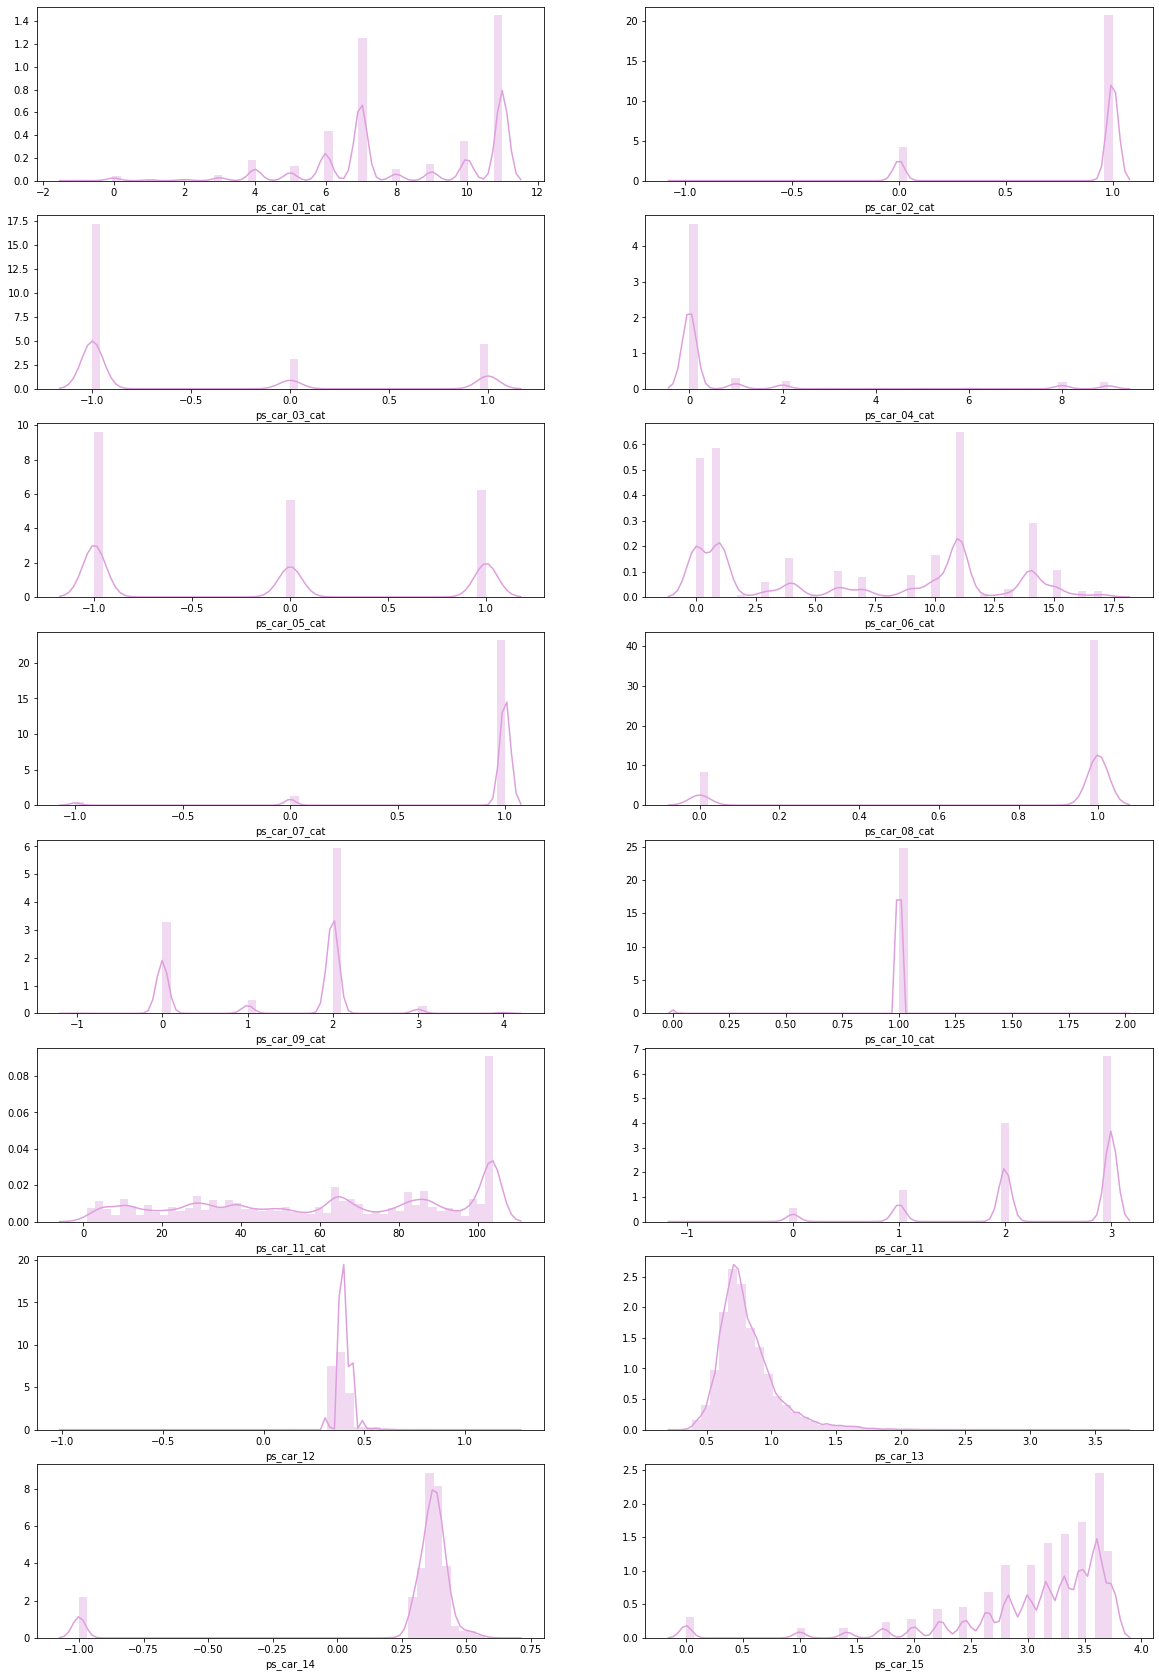

In [67]:
f, axes = plt.subplots(8, 2, figsize=(20, 30), sharex=False)
idx=0
idy=0
for col in car_cols:
    sns.distplot(data_set[col], color="plum", ax=axes[idx, idy])
    if(idy==0):
        idy += 1
    elif(idy==1):
        idx += 1
        idy = 0

All of these features are categorical. 03 and 05 have a high amount of -1 or NA values. 12, 13, 14, and to a lesser extent 15 all look like relatively normal distributions with an amount of 14's points categorized as -1. The majority of 11's frequencies are in the later values. 11_cat seems to have the highest distribution at 100. 10 has the majority of values equal to 1 along with 08, 07, and 02. The rest of the features have some semblance of even distribution with clusters around multiple values.

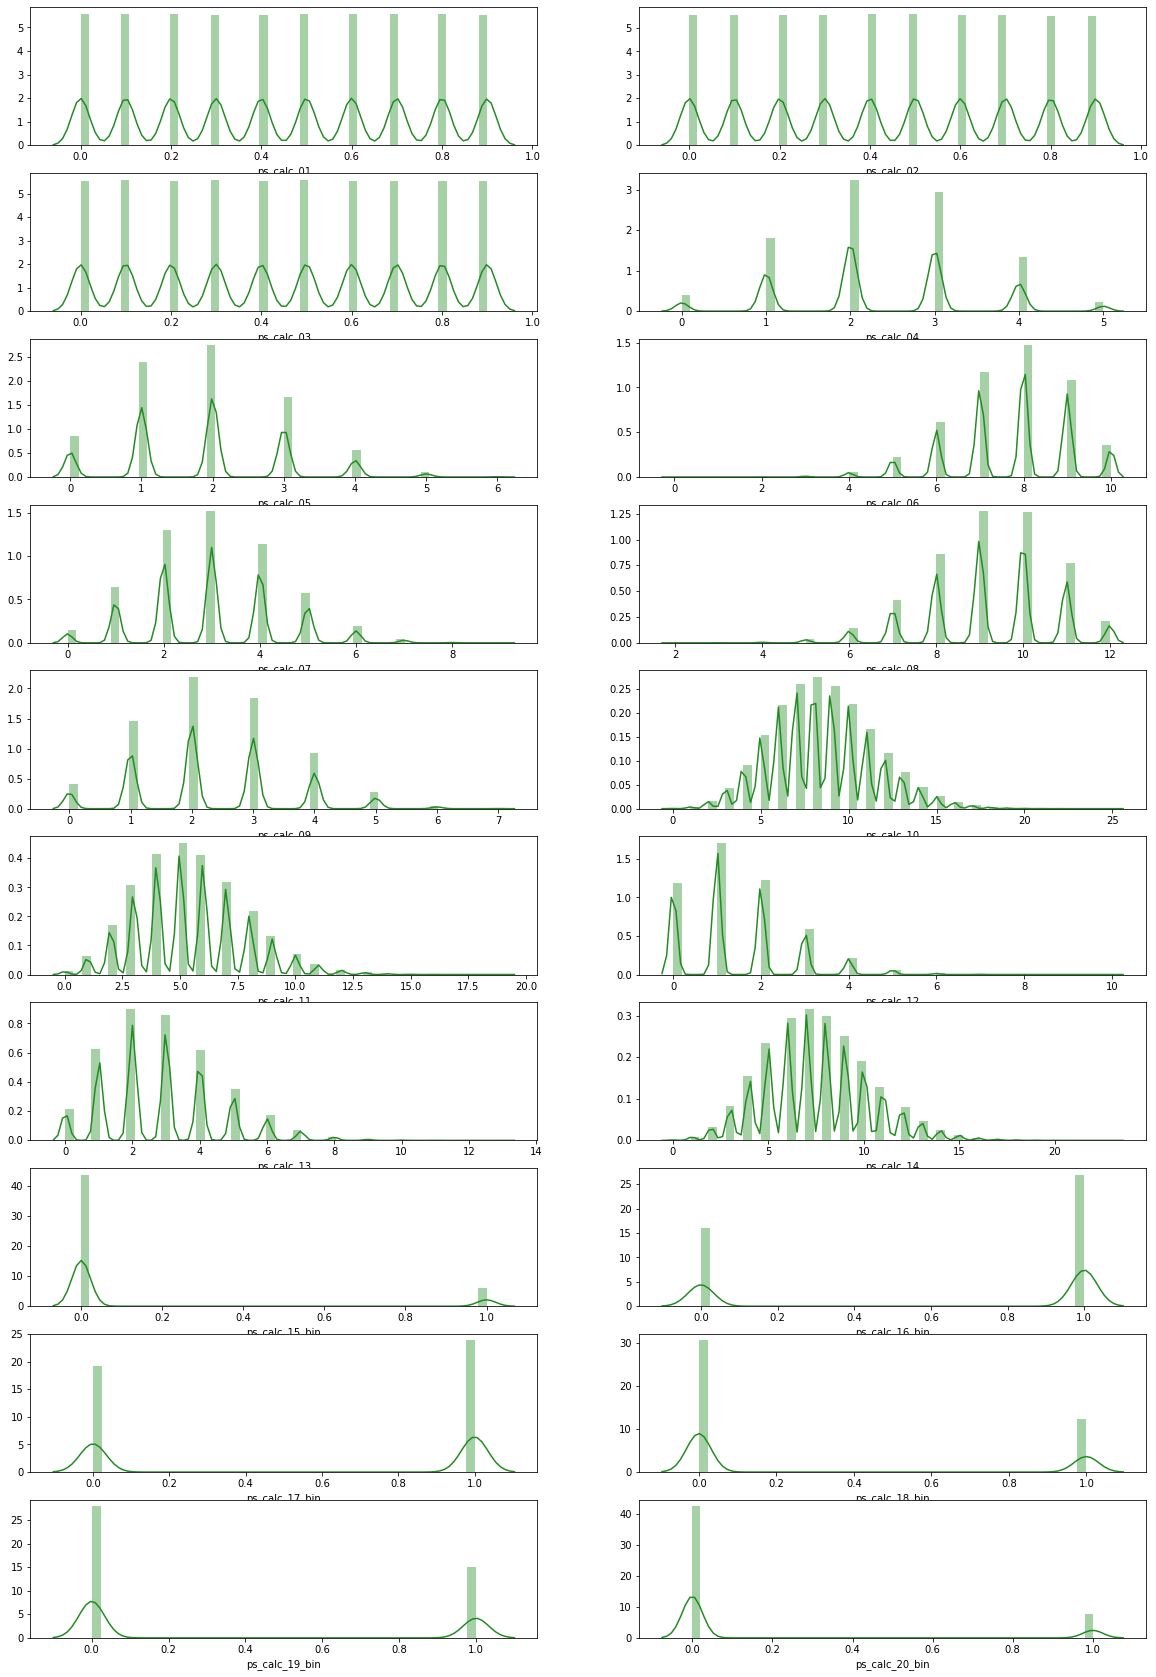

In [72]:
f, axes = plt.subplots(10, 2, figsize=(20, 30), sharex=False)
idx=0
idy=0
for col in calc_cols:
    sns.distplot(data_set[col], color="forestgreen", ax=axes[idx, idy])
    if(idy==0):
        idy += 1
    elif(idy==1):
        idx += 1
        idy = 0

01, 02, 03 are evenly distributed. 04 through 14 resemble normal distributions. 15, 18, and 20 are binaries that skew to 0 and the rest of the binaries are split evenly enough.

Taking inspiration from the top-rated submitted notebook for this problem on Kaggle (https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda) I will now take a look at the different distributions between only rows that made claims and only rows that did not make claims.

To do this I will create two subsets of the data (claims and no claims) and compare the same histograms as before between the two subsets. The claim data is red on the left and the no-claim data is blue on the right

In [76]:
data_claims = data_set.query('target == 1')
data_noclaims = data_set.query('target == 0')
data_claims.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
19,64,1,0,1,2,1,0,1,0,0,...,10,3,1,11,0,1,1,0,1,0
28,84,1,0,2,0,1,4,1,0,0,...,3,2,0,8,0,1,1,0,0,0
39,107,1,2,1,3,1,0,0,0,1,...,6,0,8,14,0,1,0,1,0,0
41,110,1,5,2,1,0,0,0,0,1,...,5,2,0,7,1,1,0,0,0,0


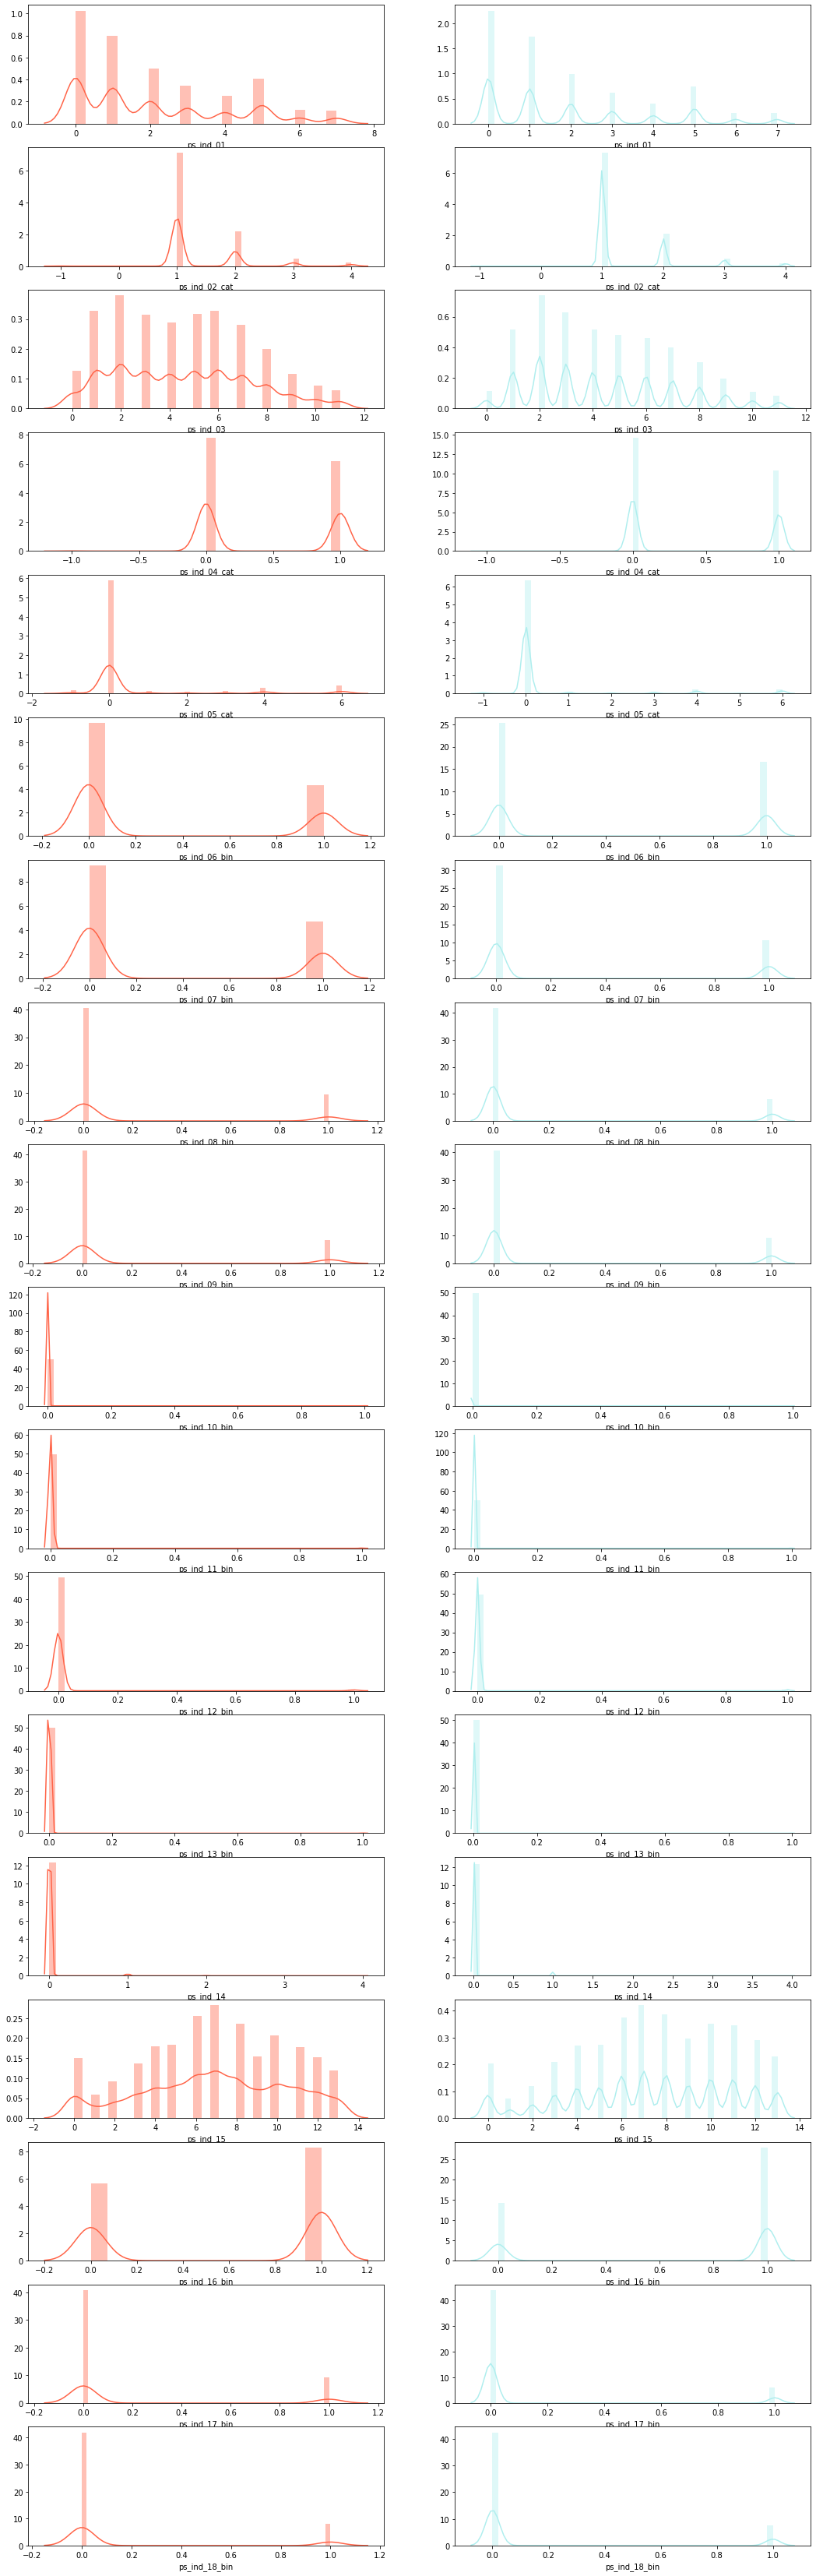

In [80]:
import seaborn as sns
f, axes = plt.subplots(18, 2, figsize=(18, 60), sharex=False)
idx=0
idy=0
for col in ind_cols:
    sns.distplot(data_claims[col], color="tomato", ax=axes[idx, 0])
    sns.distplot(data_noclaims[col], color="paleturquoise", ax=axes[idx, 1])
    idx += 1

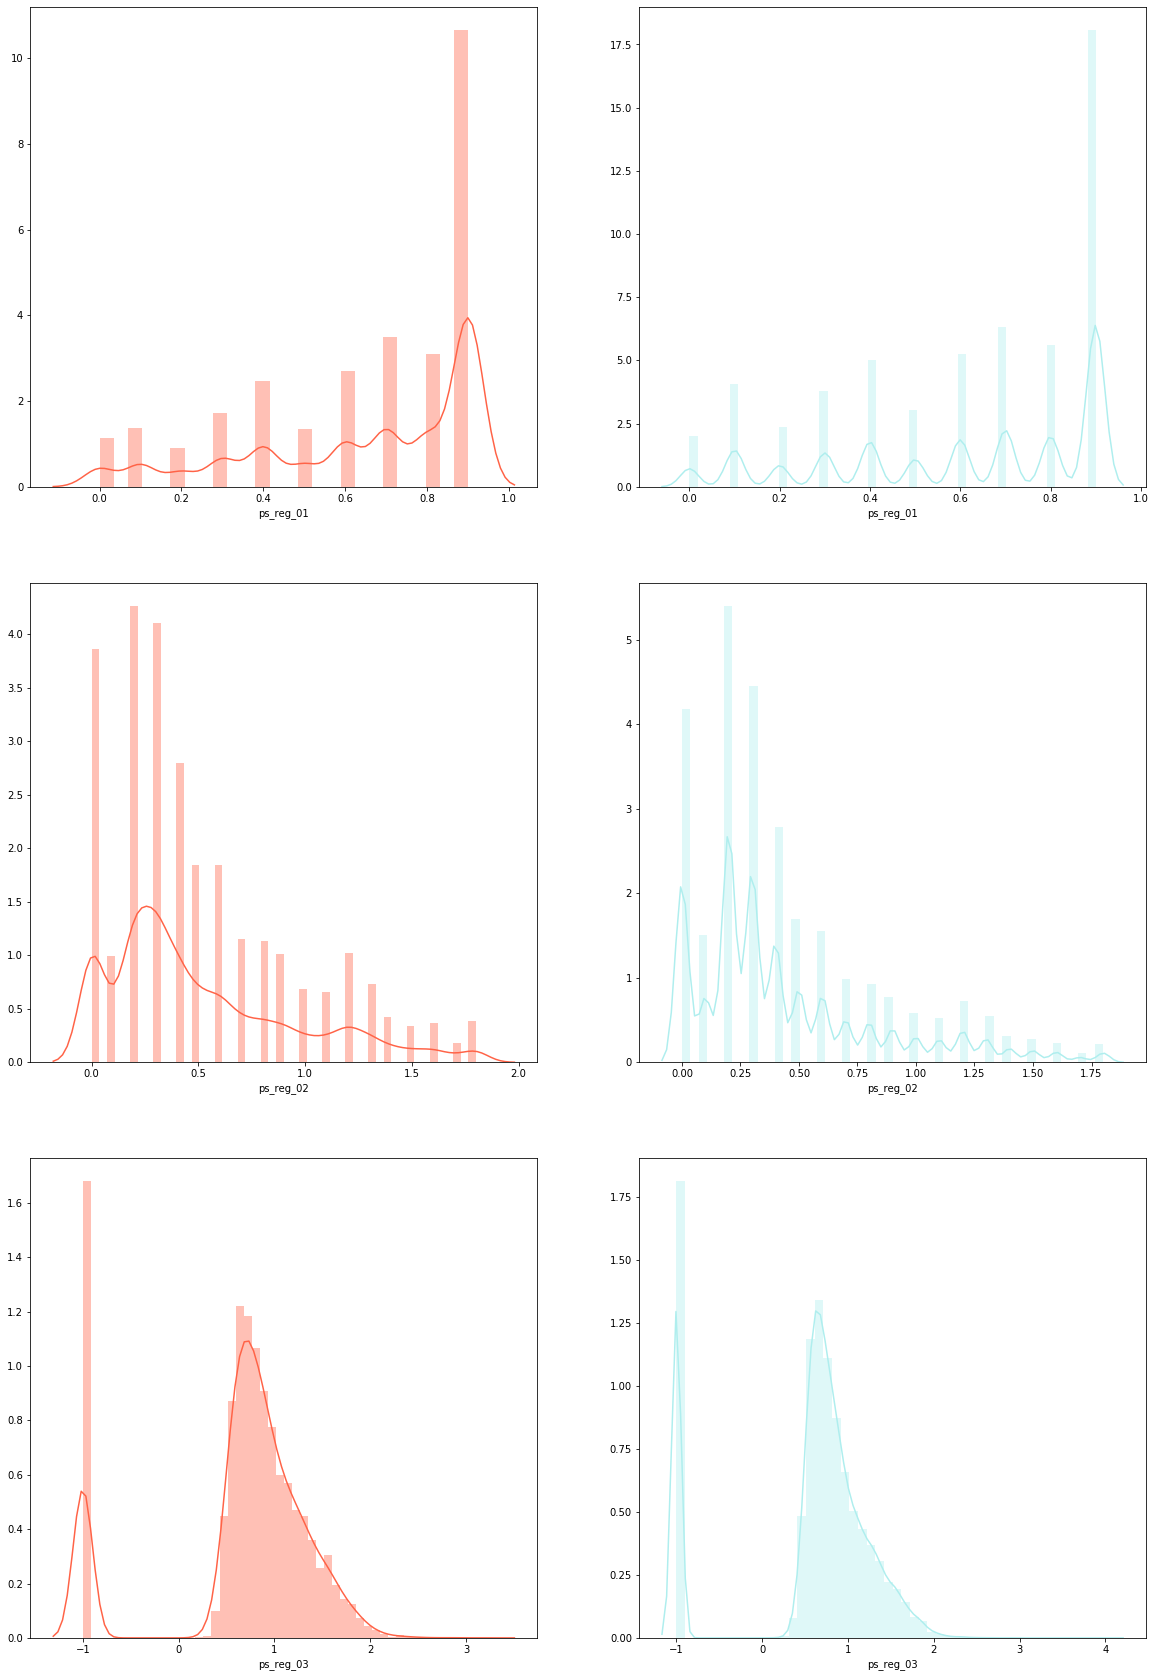

In [81]:
f, axes = plt.subplots(3, 2, figsize=(20, 30), sharex=False)
idx=0
idy=1
for col in reg_cols:
    sns.distplot(data_claims[col], color="tomato", ax=axes[idx, 0])
    sns.distplot(data_noclaims[col], color="paleturquoise", ax=axes[idx, 1])
    idx += 1

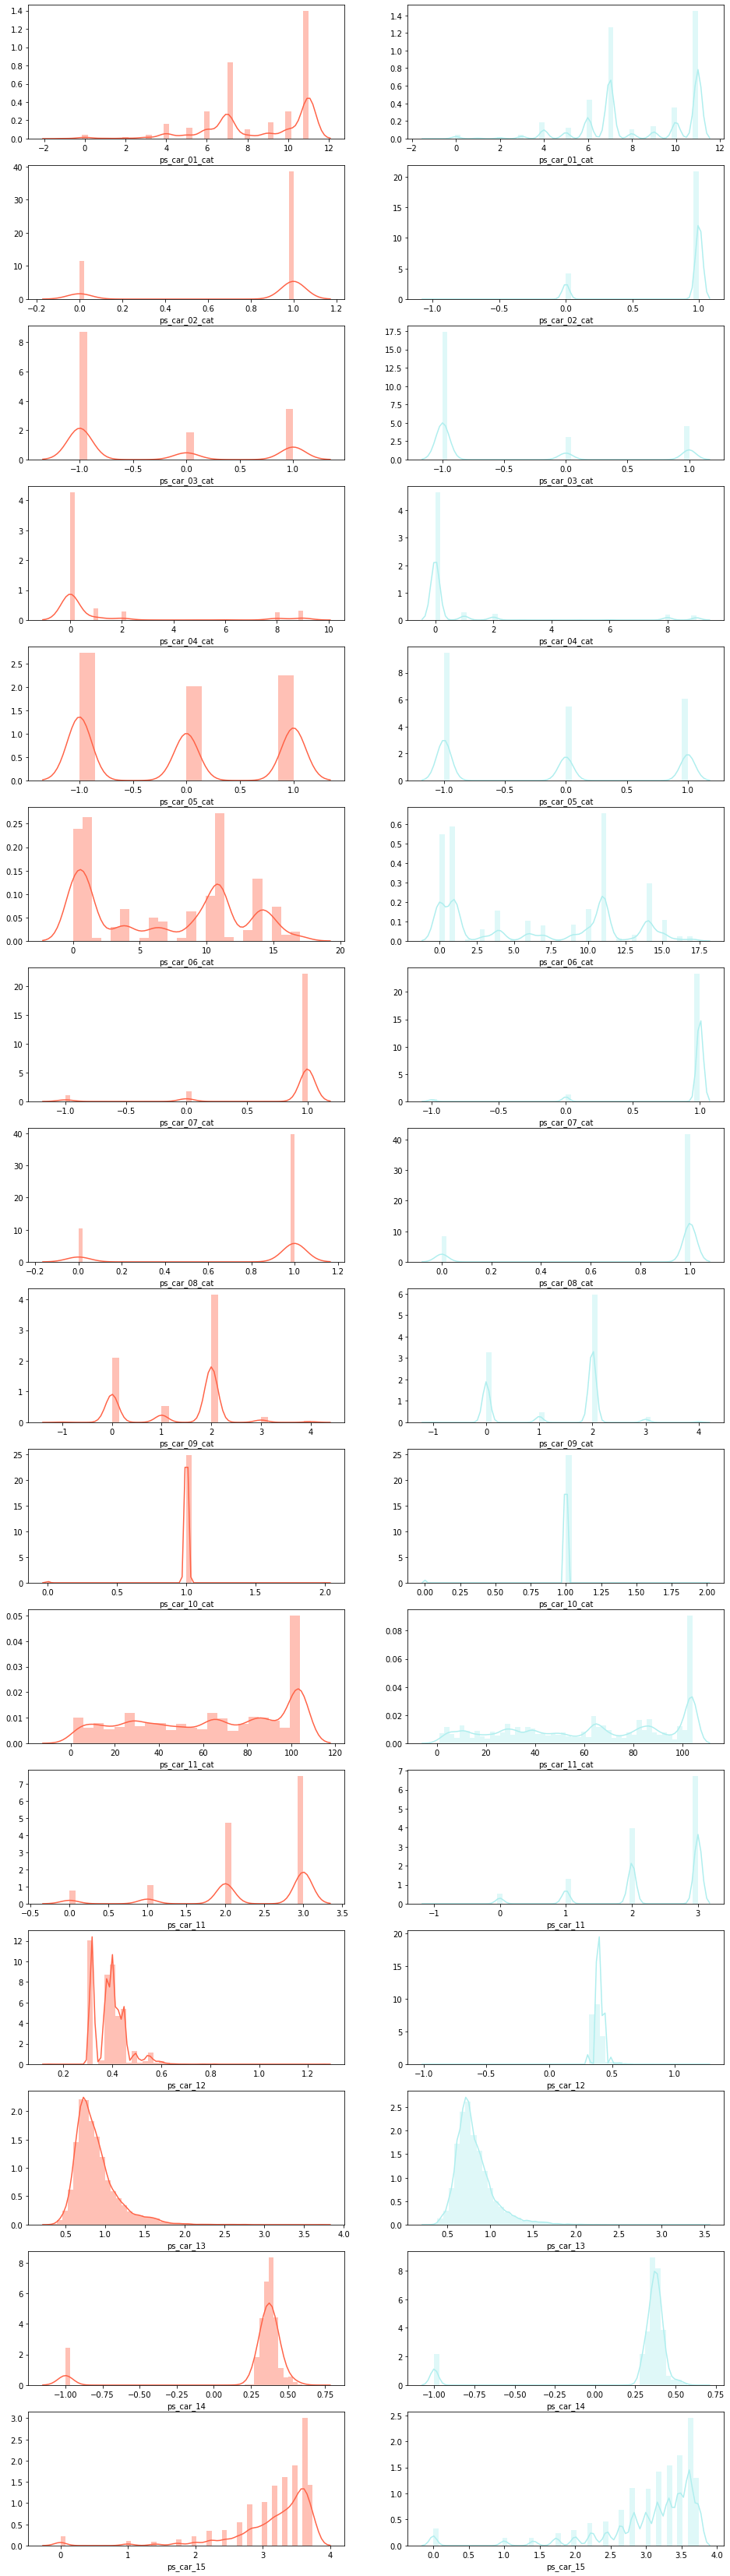

In [83]:
f, axes = plt.subplots(16, 2, figsize=(16, 60), sharex=False)
idx=0
idy=0
for col in car_cols:
    sns.distplot(data_claims[col], color="tomato", ax=axes[idx, 0])
    sns.distplot(data_noclaims[col], color="paleturquoise", ax=axes[idx, 1])
    idx += 1

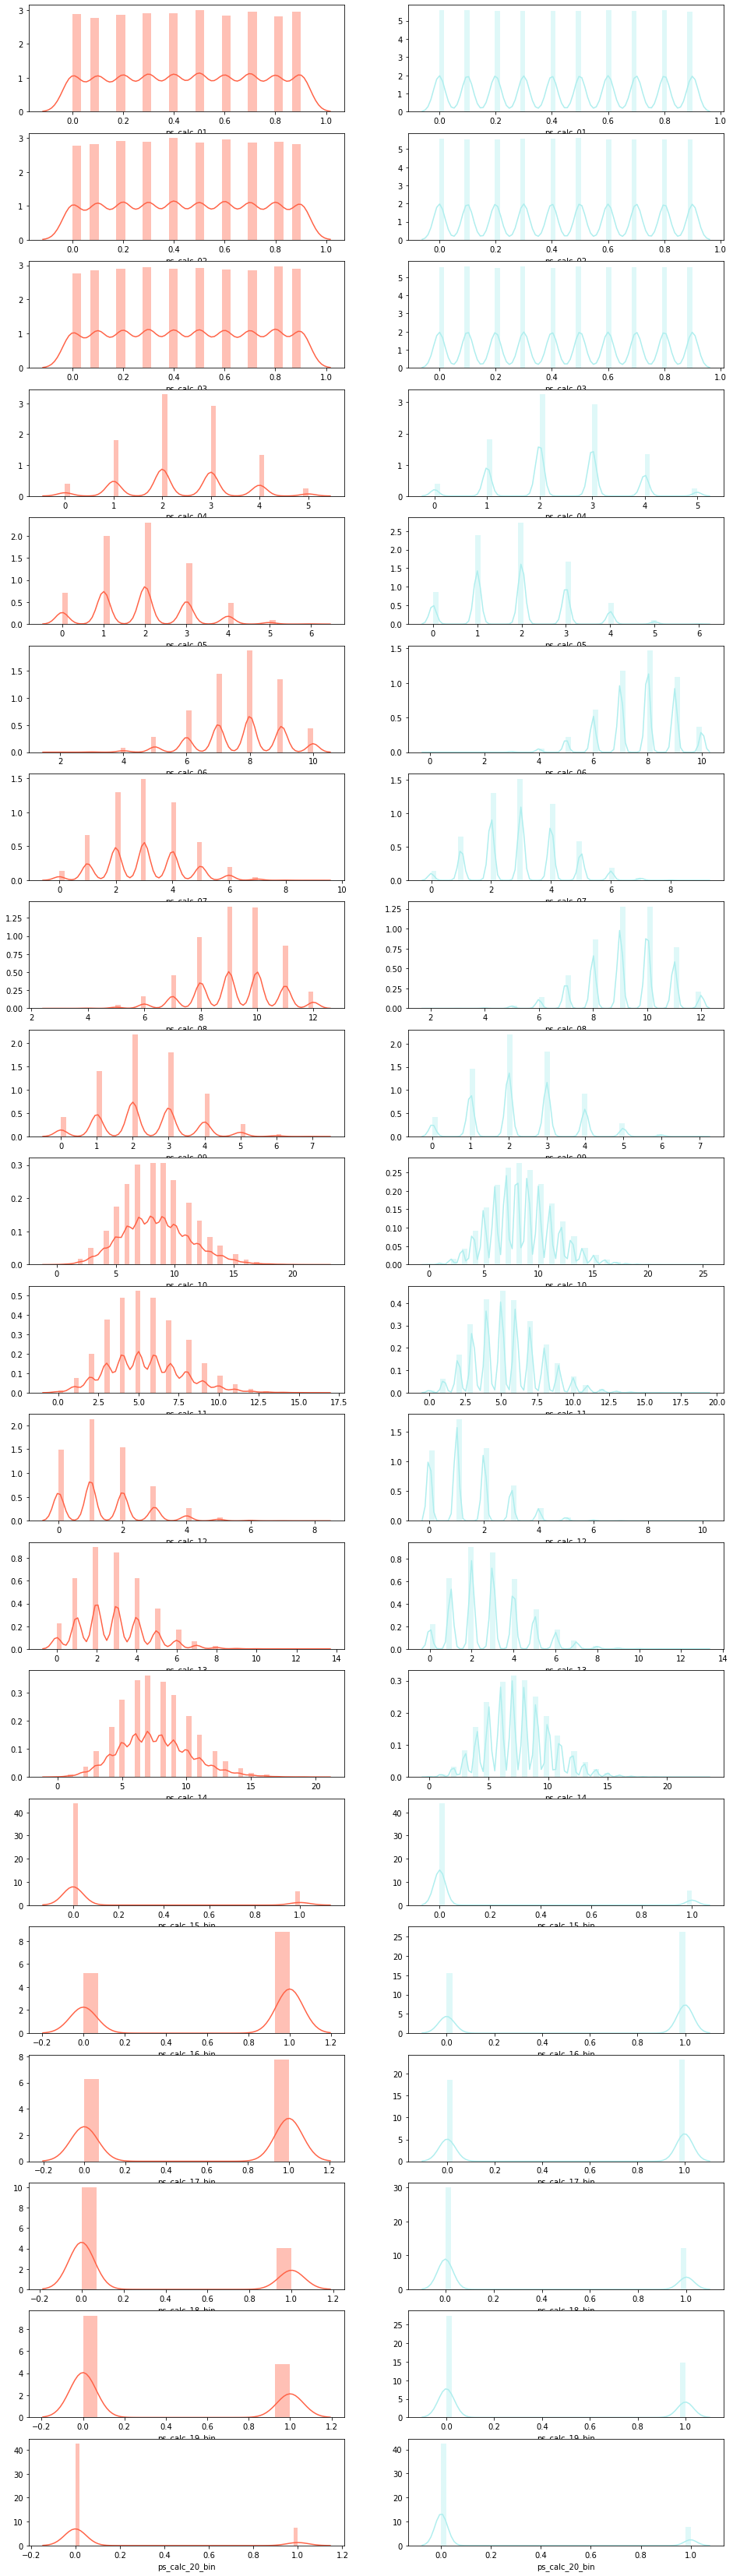

In [85]:
f, axes = plt.subplots(20, 2, figsize=(16, 60), sharex=False)
idx=0
idy=0
for col in calc_cols:
    sns.distplot(data_claims[col], color="tomato", ax=axes[idx, 0])
    sns.distplot(data_noclaims[col], color="paleturquoise", ax=axes[idx, 1])
    idx += 1

Most of the histograms visually seem similar. The ones that "stick out" the most visually are ps_reg_03 (which also happens to contain a lot of null data), ps_car_04_cat, ps_car_12, ps_car_13, ps_car_14, ps_ind_05_cat, ps_ind_03, ps_ind_17_bin. These I would like to point out only show some sort of difference to the naked eye. 

Given that over 96% of the data that is given shows no claim, any model trained on this bare data could may well give the same output for every input and still get a 96% validation rate. There are a few ways around this. One could be undersampling the data therefore "scrapping" almost all of the training data so that there is an equal amount for each possible classification then training a model only on that data.

Another method for avoiding a model like the one described above would be to employ feature selection. We could choose the 10 or so most important features and fit a model according to those features.

In [221]:
class_1_count = data_claims.target.value_counts()
class_1_count
#had to change n=class_1_count to 21694 in order to avoid error
data_noclaims_under = data_noclaims.sample(n=21694, random_state=42, axis=0)
data_under = pd.concat([data_noclaims_under, data_claims], axis=0)
data_under.drop("id", axis=1, inplace=True)
data_under

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
186382,0,0,3,3,0,0,1,0,0,0,...,13,1,1,4,0,0,0,0,1,0
152763,0,0,2,9,1,0,0,0,0,1,...,2,2,5,1,0,1,0,0,0,0
424300,0,6,1,7,0,0,1,0,0,0,...,4,2,3,7,0,0,1,0,0,1
187754,0,5,1,8,1,0,0,1,0,0,...,3,1,1,5,0,1,0,0,1,0
196716,0,0,2,2,0,0,1,0,0,0,...,8,3,3,10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595006,1,5,1,7,0,3,0,0,1,0,...,10,1,5,7,0,1,1,0,0,0
595046,1,1,1,5,0,0,0,0,1,0,...,9,2,1,5,0,1,0,0,0,0
595099,1,0,1,6,1,0,0,1,0,0,...,3,2,1,6,0,1,1,0,0,0
595113,1,0,2,2,0,0,1,0,0,0,...,5,0,4,4,0,0,1,0,1,0


This is now a simple undersampled data set. We have exactly the same amount of claim data as we do no-claim data. Now we can split this into a training set and test set and fit a model to it. We will also need to one-hot-encode categorical variables. Here we go!

In [222]:
y = data_under.target
y

186382    0
152763    0
424300    0
187754    0
196716    0
         ..
595006    1
595046    1
595099    1
595113    1
595158    1
Name: target, Length: 43388, dtype: int64

In [229]:


from sklearn.model_selection import train_test_split

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(data_under, y, test_size=0.2)
print(X_train_u.shape, y_train_u.shape)
print(X_test_u.shape, y_test_u.shape)
X_train_curr=X_train_u.copy()
X_test_u_curr = X_test_u.copy()
X_train_u.drop("target", axis=1, inplace=True)
X_test_u.drop("target", axis=1, inplace=True)


(34710, 58) (34710,)
(8678, 58) (8678,)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Warning given is OKAY

In [302]:
submit_ids

submit_data = submission_set.drop("id", axis=1, inplace=False)
submit_data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,0,1,6,0,0,0,1,0,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,5,3,5,1,0,0,0,1,0,0,...,6,2,2,11,0,0,1,1,0,0
892813,0,1,5,0,0,1,0,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,6,1,5,1,0,0,0,0,1,0,...,1,1,2,7,1,1,0,0,0,0


In [303]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = [col for col in data_under.columns if 'cat' in col]


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
cat_attribs = cat_cols
pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
    ])
train_under_encoded = pipeline.fit_transform(X_train_u)
test_under_encoded = pipeline.transform(X_test_u)
submit_data_encoded = pipeline.transform(submit_data)

In [304]:
print(train_under_encoded.shape)
print(test_under_encoded.shape)
print(X_train_u.shape)
print(X_test_u.shape)

(34710, 184)
(8678, 184)
(34710, 57)
(8678, 57)


I will now try to fit the transformed data to an XGBoost model which is a gradient boosting form of a decision tree model. It is incredibly popular among the ML community. 

In [305]:
import xgboost as xgb
#data_under_no_target = data_under.copy()
#data_under_no_target.drop("target", axis=1, inplace=True)
#feature_names = train_under_encoded.columns
data_dmatrix = xgb.DMatrix(data=train_under_encoded,label=y_train_u)
data_dmatrix

In [306]:
xgb_class = xgb.XGBClassifier()

In [307]:
xgb_class.fit(train_under_encoded, y_train_u, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [308]:
preds = xgb_class.predict(test_under_encoded)
preds

array([1, 0, 0, ..., 0, 0, 0])

In [309]:
y_test_u

394253    0
486515    0
161282    0
408572    1
222917    0
         ..
268275    0
319886    1
425872    0
161580    0
564836    0
Name: target, Length: 8678, dtype: int64

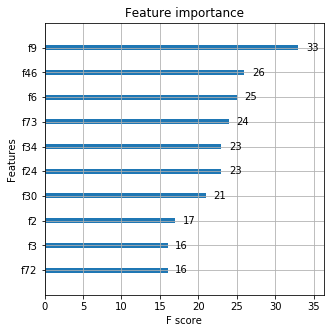

In [310]:
xgb.plot_importance(xgb_class, max_num_features=10)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Confusion matrix:
 [[2676 1614]
 [2103 2285]]


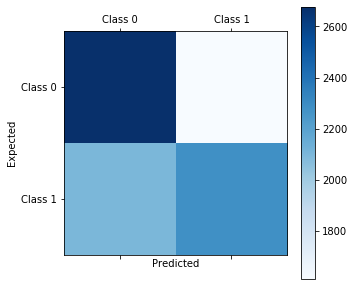

In [311]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test_u, y_pred=preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Here we see from the confusion matrix of the test data that while the majority of test data is being predicted correctly, There is quite a large amount of incorrectly identified classes. Now I will try to train an XGBoost classifier with a validation set (eval set) to see if I can improve performance. Just for reference- this model successfully predicted 57% of test data.

Confusion matrix:
 [[11275  6129]
 [ 8031  9275]]


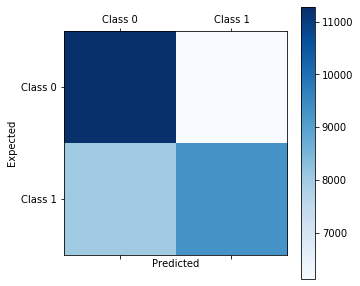

In [312]:
train_preds = xgb_class.predict(train_under_encoded)

conf_mat = confusion_matrix(y_true=y_train_u, y_pred=train_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

... and 59% of training data.

In [313]:
X_train_u2, X_eval_u, y_train_u2, y_eval_u = train_test_split(train_under_encoded, y_train_u, test_size=0.2)
print(X_train_u2.shape, y_train_u2.shape)
print(X_eval_u.shape, y_eval_u.shape)

(27768, 184) (27768,)
(6942, 184) (6942,)


In [314]:
xgb_class2 = xgb.XGBClassifier()

In [315]:
eval_set = [(X_train_u2,y_train_u2), (X_eval_u,y_eval_u)]
xgb_class2.fit(X_train_u2,y_train_u2, eval_set=eval_set, eval_metric=["auc"], early_stopping_rounds=20, verbose=True)

[0]	validation_0-auc:0.575918	validation_1-auc:0.579766
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.58412	validation_1-auc:0.583598
[2]	validation_0-auc:0.596487	validation_1-auc:0.594269
[3]	validation_0-auc:0.597408	validation_1-auc:0.595478
[4]	validation_0-auc:0.599763	validation_1-auc:0.596014
[5]	validation_0-auc:0.599837	validation_1-auc:0.595967
[6]	validation_0-auc:0.601439	validation_1-auc:0.596366
[7]	validation_0-auc:0.604684	validation_1-auc:0.600361
[8]	validation_0-auc:0.605027	validation_1-auc:0.600216
[9]	validation_0-auc:0.605708	validation_1-auc:0.600066
[10]	validation_0-auc:0.606376	validation_1-auc:0.600918
[11]	validation_0-auc:0.606476	validation_1-auc:0.601456
[12]	validation_0-auc:0.608129	validation_1-auc:0.602261
[13]	validation_0-auc:0.608624	validation_1-auc:0.602858
[14]	validation_0-auc:0.608997	validation_1-auc:0.603045

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Confusion matrix:
 [[2674 1616]
 [2076 2312]]


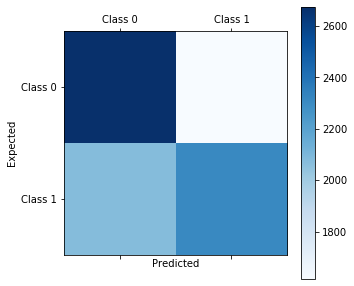

In [316]:
preds2 = xgb_class2.predict(test_under_encoded)

conf_mat = confusion_matrix(y_true=y_test_u, y_pred=preds2)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

It performed about the same.

Confusion matrix:
 [[11205  6199]
 [ 8002  9304]]


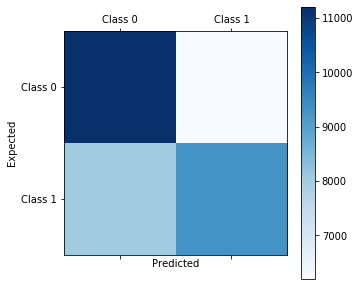

In [317]:
train_preds2 = xgb_class2.predict(train_under_encoded)

conf_mat = confusion_matrix(y_true=y_train_u, y_pred=train_preds2)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

This one is also nearly the same as the previous confusion matrix. Therefore the inclusion of the validation evaluation does not seem to help. I tried to include different evaluation metrics however none of them would run except for "auc". Now let's look again at feature importances.

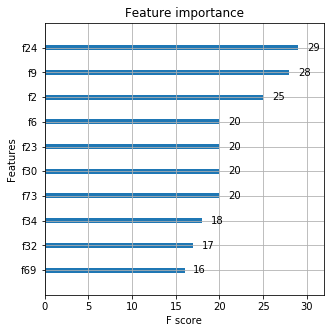

In [318]:
xgb.plot_importance(xgb_class2, max_num_features=10)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

The features do not correspond to the feature names we have however maybe we can work around this.

In [319]:
len(xgb_class2.feature_importances_)

184

Despite my many efforts there does not seem to be a way to "work backwards" and take these features from the plot and correspond them back to their original feature names as we explored before modelling. If given more time I hopefully would have figured out a way to do this. No matter, for now I will try the SelectKBest SciKitLearn function to only focus on the top 10 features based on. I'm using the Chi2 scoring function because it measures dependency on each feature.

In [320]:
selection = SelectKBest(chi2, k=12).fit(train_under_encoded, y_train_u)
X_train_u_fselect= selection.transform(train_under_encoded)
X_train_u_fselect.shape

(34710, 12)

Now let's try xgboost model again before we explore other models and conclude our exploration.

In [321]:
xgb_class3 = xgb.XGBClassifier()
xgb_class3.fit(X_train_u_fselect, y_train_u, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Confusion matrix:
 [[2739 1551]
 [2304 2084]]


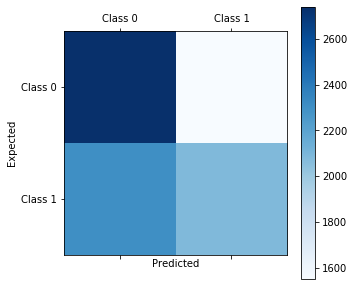

0.573314993122421
0.4749316317228806


In [322]:
X_test_fselect = selection.transform(test_under_encoded)

preds3 = xgb_class3.predict(X_test_fselect)

conf_mat = confusion_matrix(y_true=y_test_u, y_pred=preds3)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test_u, preds3))
print(recall_score(y_test_u, preds3))

Training the model with only 12 best features made the model perform a little bit worse. Now I will look at f1 score then try different models on the original data with all features and see how they compare.

In [323]:
from sklearn.metrics import f1_score
f1_score(y_test_u, preds3)

0.519506419045245

F1 score takes into account the "harmonic mean" between precision and recall. As the best possible f1 value is 1, I would rate this score as... not great.

In [324]:
print("F1 score using only 12 best features = ", f1_score(y_test_u, preds3))
print("F1 score using all features and validation set = ", f1_score(y_test_u, preds2))
print("F1 score using all features no eval set = ", f1_score(y_test_u, preds))

F1 score using only 12 best features =  0.519506419045245
F1 score using all features and validation set =  0.5560365560365562
F1 score using all features no eval set =  0.5514661518040305


By a small margin the best F1 scoring model is xgb_class2 which is the one that used the eval set. Now I will look at a decision tree classifier and compare the two models. Even though the xgboost model is a gradient boosting form of a decision tree model, it will be interesting to compare their performances and choose the best one. As the missing "-1" values are all part of categorical variables we will continue to treat it as a separate category (perhaps there could be a REASON why that data is missing).

In [325]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_under_encoded, y_train_u)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

F1 score using Decision Tree Classifier =  0.4802217183169564
Confusion matrix:
 [[2646 1644]
 [2482 1906]]


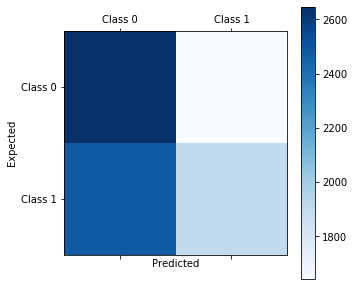

In [326]:
tree_preds = dtc.predict(test_under_encoded)
print("F1 score using Decision Tree Classifier = ", f1_score(y_test_u, tree_preds))

conf_mat = confusion_matrix(y_true=y_test_u, y_pred=tree_preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

This decision tree regressor gives the lowest f1 score. Therefore I will go with the XGBoost model that was used with validation data that performed the best f1 score.

In [328]:
submission_predictions = xgb_class2.predict(submit_data_encoded)
submission_predictions

array([0, 0, 0, ..., 1, 1, 1])

In [329]:
submit_ids

,id
0,0
1,1
2,2
3,3
4,4
...,...
892811,1488022
892812,1488023
892813,1488024
892814,1488025


In [330]:
submit_ids['target'] = submission_predictions
submit_ids

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
892811,1488022,1
892812,1488023,1
892813,1488024,1
892814,1488025,1


ignore warning

In [331]:
submit_ids.describe()

,id,target
count,8.928160e+05,892816.000000
mean,7.441535e+05,0.378407
std,4.296830e+05,0.484990
min,0.000000e+00,0.000000
25%,3.720218e+05,0.000000
50%,7.443070e+05,0.000000
75%,1.116308e+06,1.000000
max,1.488026e+06,1.000000


In [332]:
submit_ids.to_csv('submission.csv', index=False)

Done! Now I will submit the "submission.csv" file and look at the results.

My score is: 0.15384... The top score is 0.29698. My name on the leaderboard is Ria Chakrabarti!

I took some inspiration from other submitted notebooks. I found them to be excellent for learning and a great resource. Here are links to the notebooks I looked at: https://www.kaggle.com/headsortails/steering-wheel-of-fortune-porto-seguro-eda/report, https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets, https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial